In [1]:
# Let's do our imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [2]:
!pip install category_encoders

In [3]:
import category_encoders as ce

In [4]:
!pip install -U pandas-profiling

Requirement already up-to-date: pandas-profiling in c:\programdata\anaconda3\lib\site-packages (2.1.2)


In [5]:
# Now let's import our csv into a dataframe
url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/nyc/nyc-rent-2016.csv'
df = pd.read_csv(url)
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,...,high_speed_internet,balcony,swimming_pool,new_construction,exclusive,terrace,loft,garden_patio,common_outdoor_space,wheelchair_access
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,...,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape # should be (48300, 34)

(48300, 34)

In [7]:
# 'created' should be in the correct format
df['created'] = pd.to_datetime(df['created'], infer_datetime_format=True)
df['created'].head()

0   2016-06-24 07:54:24
1   2016-06-12 12:19:27
2   2016-04-17 03:26:41
3   2016-04-18 02:22:02
4   2016-04-28 01:32:41
Name: created, dtype: datetime64[ns]

In [8]:
df['created'].sample(10)

30224   2016-05-05 06:31:12
18295   2016-06-07 06:21:59
41938   2016-04-04 15:51:21
46779   2016-04-28 05:58:16
31235   2016-05-21 02:21:44
16377   2016-06-23 01:41:13
20048   2016-06-07 02:59:55
48047   2016-04-22 03:09:25
40476   2016-05-16 03:21:10
12956   2016-06-12 03:19:56
Name: created, dtype: datetime64[ns]

In [9]:
# Now let's get a month column
df['month'] = df['created'].dt.month
df['month'].head()

0    6
1    6
2    4
3    4
4    4
Name: month, dtype: int64

In [10]:
df['month'].unique()

array([6, 4, 5], dtype=int64)

In [11]:
# We'll use months 4 & 5 to train and month 6 to test
train = df[df['month'] < 6]
test = df[df['month'] == 6]

In [12]:
# Let's make sure we didn't lose any data
train.shape[0] + test.shape[0]

48300

In [13]:
tpm = train['price'].mean()
tpm

3432.7534190068222

In [14]:
# Now let's get our baseline
ytest = test['price']
ypred = np.full_like(ytest, fill_value=tpm)
print(len(ytest), len(ypred))
print(ypred)
print(f"MAE: {mean_absolute_error(ytest, ypred)}")

16785 16785
[3432 3432 3432 ... 3432 3432 3432]
MAE: 1052.5193327375632


In [15]:
# Let's see all the features so we can choose some for our model
list(df)

['bathrooms',
 'bedrooms',
 'created',
 'description',
 'display_address',
 'latitude',
 'longitude',
 'price',
 'street_address',
 'interest_level',
 'elevator',
 'cats_allowed',
 'hardwood_floors',
 'dogs_allowed',
 'doorman',
 'dishwasher',
 'no_fee',
 'laundry_in_building',
 'fitness_center',
 'pre-war',
 'laundry_in_unit',
 'roof_deck',
 'outdoor_space',
 'dining_room',
 'high_speed_internet',
 'balcony',
 'swimming_pool',
 'new_construction',
 'exclusive',
 'terrace',
 'loft',
 'garden_patio',
 'common_outdoor_space',
 'wheelchair_access',
 'month']

In [16]:
# We'll go with the same number of features as the lecture
feats = [
    'bedrooms',
    'latitude',
    'doorman',
    'laundry_in_unit',
    'balcony'
]

target = 'price'
xtrain = train[feats]
ytrain = train[target]

xtest = test[feats]
ytest = test[target]

In [17]:
xtrain.shape, ytrain.shape

((31515, 5), (31515,))

In [18]:
# Now we'll do the one hot encoding
encoder = ce.OneHotEncoder(use_cat_names=True)
xtrain = encoder.fit_transform(xtrain)
xtest = encoder.fit_transform(xtest)

In [19]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
xtrain

array([[-0.45807512, -0.30435554, -0.85677923, -0.45019882, -0.25008427],
       [-0.45807512,  0.07968984, -0.85677923, -0.45019882, -0.25008427],
       [ 2.28697859,  1.86511936, -0.85677923, -0.45019882, -0.25008427],
       ...,
       [-0.45807512,  0.23737735,  1.16716181, -0.45019882, -0.25008427],
       [-1.37309302, -1.12331324,  1.16716181, -0.45019882, -0.25008427],
       [ 0.45694278,  3.02997224, -0.85677923, -0.45019882, -0.25008427]])

In [21]:
# Ok, now let's use our model
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
ypred = model.predict(xtest)
ypred

array([4144.83579264, 4107.28292324, 2443.38548612, ..., 2593.17835091,
       4105.36003665, 3852.96279607])

In [23]:
# Let's see the MAE
mean_absolute_error(ytest, ypred)

771.1981260334376

In [24]:
# Now the coefficient
model.coef_

array([791.33792681, -76.93359624, 413.77943184, 182.89486926,
        10.82489064])

In [25]:
# and the intercept
model.intercept_

3432.753419006835

In [26]:
# Now let's try some different features to improve our MAE
# We'll go with the same number of features as the lecture
feats = [
    'bedrooms',
    'outdoor_space',
    'bathrooms',
    'dining_room',
    'loft'
]

target = 'price'
xtrain = train[feats]
ytrain = train[target]

xtest = test[feats]
ytest = test[target]

In [27]:
# Now we'll do the one hot encoding
encoder = ce.OneHotEncoder(use_cat_names=True)
xtrain = encoder.fit_transform(xtrain)
xtest = encoder.fit_transform(xtest)

In [28]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [29]:
model = LinearRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
ypred

array([4501.19200955, 3332.35744273, 2911.92962418, ..., 2911.92962418,
       3332.35744273, 3332.35744273])

In [30]:
# Now let's see if we get a better MAE
mean_absolute_error(ytest, ypred)

751.0437102311328

In [31]:
# Slightly better. Let's give it one more try
feats = [
    'bedrooms',
    'hardwood_floors',
    'bathrooms',
    'fitness_center',
    'swimming_pool'
]


target = 'price'
xtrain = train[feats]
ytrain = train[target]

xtest = test[feats]
ytest = test[target]

# Now we'll do the one hot encoding
encoder = ce.OneHotEncoder(use_cat_names=True)
xtrain = encoder.fit_transform(xtrain)
xtest = encoder.fit_transform(xtest)

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

model = LinearRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
ypred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([4393.39286199, 3778.22781201, 2790.89574528, ..., 2790.89574528,
       3236.24310828, 3264.99906125])

In [32]:
# Now let's see if we get a better MAE
mean_absolute_error(ytest, ypred)

723.8899901597703

In [33]:
# Let's create an amenities feature that lets us know how many ameninities the listing has
# First, let's list the features we have 
list(df)

['bathrooms',
 'bedrooms',
 'created',
 'description',
 'display_address',
 'latitude',
 'longitude',
 'price',
 'street_address',
 'interest_level',
 'elevator',
 'cats_allowed',
 'hardwood_floors',
 'dogs_allowed',
 'doorman',
 'dishwasher',
 'no_fee',
 'laundry_in_building',
 'fitness_center',
 'pre-war',
 'laundry_in_unit',
 'roof_deck',
 'outdoor_space',
 'dining_room',
 'high_speed_internet',
 'balcony',
 'swimming_pool',
 'new_construction',
 'exclusive',
 'terrace',
 'loft',
 'garden_patio',
 'common_outdoor_space',
 'wheelchair_access',
 'month']

In [34]:
# Now let's make our amenities list and check their format
amlist = ['elevator', 'doorman', 'laundry_in_building', 'fitness_center', 'laundry_in_unit', 'high_speed_internet', 
          'swimming_pool', 'common_outdoor_space', 'roof_deck']
df[amlist].head()

,elevator,doorman,laundry_in_building,fitness_center,laundry_in_unit,high_speed_internet,swimming_pool,common_outdoor_space,roof_deck
0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


In [35]:
# Let's add up the ameninities
df['amenities'] = df[amlist].sum(axis=1, skipna=True)
df['amenities'].head()

0    0
1    3
2    1
3    0
4    0
Name: amenities, dtype: int64

In [36]:
# Let's take a sample
df.sample(5)

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,...,swimming_pool,new_construction,exclusive,terrace,loft,garden_patio,common_outdoor_space,wheelchair_access,month,amenities
492,1.0,1,2016-04-06 04:25:38,+ NO FEE and 1 MONTH FREE! Newly Renovated Lar...,E 74 Street,40.7688,-73.9547,3200,400 E 74 Street,low,...,0,0,0,0,0,0,0,0,4,1
9909,1.0,1,2016-04-25 02:22:11,Newly Constructed luxury building in Lincoln C...,W 67 St.,40.7756,-73.9846,2995,200 W 67 St.,medium,...,0,1,0,0,0,0,0,0,4,5
38213,1.0,1,2016-06-12 01:17:55,,Broadway,40.8136,-73.9603,1795,3133 Broadway,low,...,0,0,0,0,0,0,0,0,6,0
7618,1.0,3,2016-04-22 03:23:56,Welcome to this beautiful 3 beds flex apartmen...,Washington,40.7080,-74.0149,3500,90 Washington,low,...,0,0,0,0,1,0,0,0,4,3
35212,1.0,2,2016-05-17 14:42:01,WONDERFUL Two Bedroom on Roosevelt Island. Ver...,Main St.,40.7622,-73.9495,3150,560 Main St.,low,...,0,0,0,0,0,0,0,0,5,2


In [37]:
# We need to refresh some values since we added a feature
train = df[df['month'] < 6]
test = df[df['month'] == 6]
tpm = train['price'].mean()
tpm

3432.7534190068222

In [38]:
# Now let's use amenities to hopefully give usour best MAE
feats = [
    'bedrooms',
    'hardwood_floors',
    'bathrooms',
    'latitude',    
    'amenities']


target = 'price'
xtrain = train[feats]
ytrain = train[target]

xtest = test[feats]
ytest = test[target]

# Now we'll do the one hot encoding
encoder = ce.OneHotEncoder(use_cat_names=True)
xtrain = encoder.fit_transform(xtrain)
xtest = encoder.fit_transform(xtest)

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

model = LinearRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
ypred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([4367.72364474, 3593.64119158, 2518.80639551, ..., 2670.41974998,
       3244.26303403, 3439.23510759])

In [39]:
# Now let's get our MAE
mean_absolute_error(ytest, ypred)

707.1581075770334

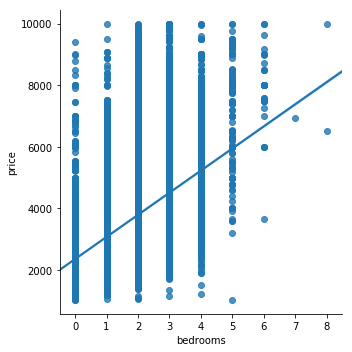

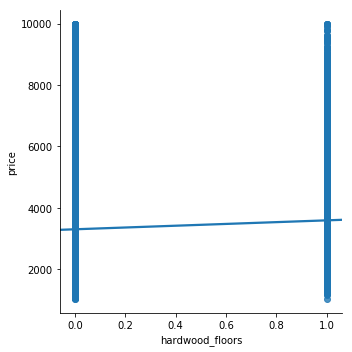

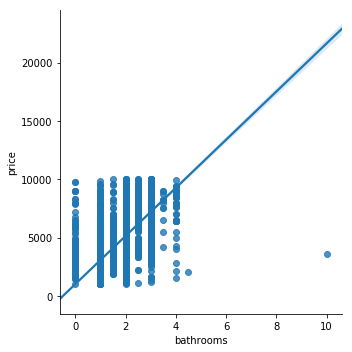

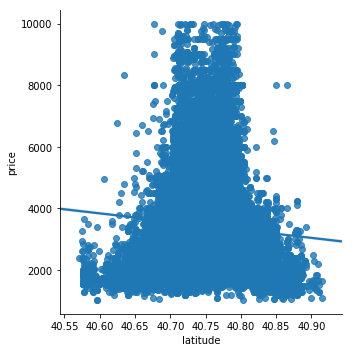

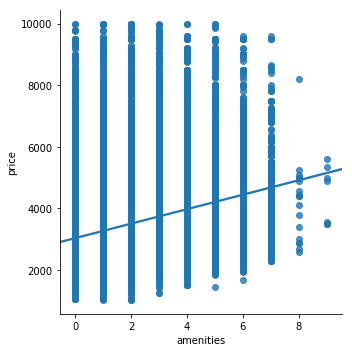

In [40]:
# Alright, now, let's work at finding our coefficients
%matplotlib inline
import seaborn as sns

target = 'price'
feats = [
    'bedrooms',
    'hardwood_floors',
    'bathrooms',
    'latitude',    
    'amenities']

for feature in feats:
    sns.lmplot(x=feature, y=target, data=df)

In [44]:
# We can show our coefficients
pd.Series(model.coef_, feats)

bedrooms           497.611965
hardwood_floors    -40.972278
bathrooms          574.627219
latitude           -77.868600
amenities          312.585938
dtype: float64

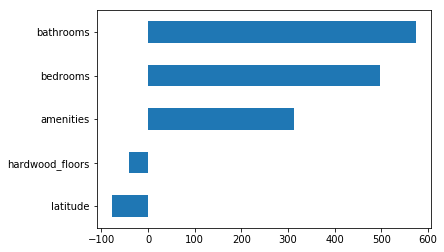

In [49]:
# We can also plot our coefficients
coefs = pd.Series(model.coef_, feats)
coefs.sort_values().plot.barh()

In [47]:
# We also need a few more values, let's import
from sklearn.metrics import mean_squared_error, r2_score

# And we can now show all of our required error values

# First the test set
mae_test = mean_absolute_error(ytest, ypred)
mse_test = mean_squared_error(ytest, ypred)
rms_test = np.sqrt(mse_test)
r2_test = r2_score(ytest, ypred)

print('For out Test Set:',
      '\nMean Absolute Error = ', mae_test,
      '\nRoot Mean Squared Error = ', rms_test,
      '\nR-Squared Error = ', r2_test
     )

For out Test Set: 
Mean Absolute Error =  707.1581075770334 
Root Mean Squared Error =  981.230622732839 
R-Squared Error =  0.5136005861528977
